In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_datasets():
    """Load all datasets from the datasets folder"""
    users = pd.read_csv('datasets/users.csv')
    items = pd.read_csv('datasets/items.csv')
    events = pd.read_csv('datasets/events.csv')

    

In [3]:
users = pd.read_csv('datasets/users.csv')
users.head()

,user_id,country
0,0,USA
1,1,USA
2,2,Italy
3,3,Japan
4,4,Italy


In [4]:
items = pd.read_csv('datasets/items.csv')
items.head()


,item_id,category,hair,eyes
0,0,flirt,red,blue
1,1,dance,brown,blue
2,2,dj,red,brown
3,3,flirt,blonde,brown
4,4,dj,red,brown


In [5]:
events = pd.read_csv('datasets/events.csv')
events.head()

,user_id,item_id,timestamp
0,0,34,1607590072
1,0,26,1607590260
2,0,187,1607590503
3,0,86,1607591006
4,0,111,1607591526


from the above data, I can see that item is performer with relavent features like hair, eyes and what they perform is defined in the category column..

Users are the viewers from different countries.

Events are the interactions of users with performers.

In [7]:
full_df = events.merge(users, on='user_id', how='left')\
                 .merge(items, on='item_id', how='left')
full_df.head()

,user_id,item_id,timestamp,country,category,hair,eyes
0,0,34,1607590072,USA,flirt,red,brown
1,0,26,1607590260,USA,dance,brown,green
2,0,187,1607590503,USA,dance,red,blue
3,0,86,1607591006,USA,dance,red,blue
4,0,111,1607591526,USA,flirt,blonde,green


In [11]:
# Convert timestamp to datetime
full_df['datetime'] = pd.to_datetime(full_df['timestamp'], unit='s')
full_df.head()

,user_id,item_id,timestamp,country,category,hair,eyes,datetime
0,0,34,1607590072,USA,flirt,red,brown,2020-12-10 08:47:52
1,0,26,1607590260,USA,dance,brown,green,2020-12-10 08:51:00
2,0,187,1607590503,USA,dance,red,blue,2020-12-10 08:55:03
3,0,86,1607591006,USA,dance,red,blue,2020-12-10 09:03:26
4,0,111,1607591526,USA,flirt,blonde,green,2020-12-10 09:12:06


In [27]:
print("Categories: ",full_df.category.unique())
print("Hair types: ",full_df.hair.unique())
print("Eyes types: ",full_df.eyes.unique())
print("total records: ",len(full_df))
print("distinct users",full_df.user_id.nunique())


Categories:  ['flirt' 'dance' 'dj']
Hair types:  ['red' 'brown' 'blonde']
Eyes types:  ['brown' 'green' 'blue']
total records:  16077
distinct users 399


In [14]:
full_df.groupby(['user_id','item_id','session_id']).size().reset_index(name='count')


array(['red', 'brown', 'blonde'], dtype=object)

In [21]:
print("distinct items: ",items.item_id.nunique())
print("total items: ",len(items))


distinct items:  200
total items:  200


In [28]:
items.head(2)

,item_id,category,hair,eyes
0,0,flirt,red,blue
1,1,dance,brown,blue


In [26]:
# Sort values directly on the Series object without 'by' parameter
items.groupby(['category', 'hair', 'eyes']).size().sort_values(ascending=False).reset_index(name='count')


,category,hair,eyes,count
0,dance,blonde,green,12
1,flirt,brown,blue,12
2,dance,red,green,11
3,dj,blonde,green,11
4,flirt,red,green,11
5,dance,brown,green,11
6,dance,blonde,blue,9
7,flirt,blonde,blue,9
8,dj,brown,blue,8
9,flirt,blonde,brown,8


### Analyse()
Considering two sessions of the same user separate if there is a gap of >= 8 hours between two events, remove duplicate visits of the same item within the session(keep only the first) and excluding sessions with only a single event, output the following information about the dataset:
- Number of sessions
- Average (mean) number of events per session
- Histogram of session lengths in 10 bins
- Category with highest bounce rate (most often occurring as the last event within a session).
- Country with highest average visit count per user
- Performer with most visits by each category

In [65]:
events = pd.read_csv('datasets/events.csv')

In [44]:
print("Events: ",len(events))
events.head(2)

Events:  16077


,user_id,item_id,timestamp
0,0,34,1607590072
1,0,26,1607590260


In [45]:
# Sort values directly on the Series object without 'by' parameter
events.groupby(['user_id', 'item_id', 'timestamp']).size().sort_values(ascending=False).reset_index(name='count')

,user_id,item_id,timestamp,count
0,499,199,1607536718,1
1,0,3,1607592538,1
2,0,14,1607596646,1
3,0,26,1607590260,1
4,0,26,1607594053,1
...,...,...,...,...
16072,0,100,1607596139,1
16073,0,102,1607592038,1
16074,0,102,1607592523,1
16075,0,105,1607596882,1


In [46]:
print("event users: ",events.user_id.unique())
print("distinct users: ",events.user_id.nunique())
print()
print("total users: ", users.user_id.unique())
print("distinct users in users: ",users.user_id.nunique())
print("distinct countries: ",users.country.nunique())


event users:  [  0   1   2   3   4   6   7   9  10  11  13  15  16  17  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  36  37  39  40  41  42  45
  46  47  48  49  51  53  55  57  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  75  76  77  78  79  80  81  82  83  85  86  87  89  90
  91  93  94  96  98  99 100 101 102 103 104 105 107 109 110 112 113 114
 116 117 119 121 122 123 125 126 127 128 129 130 132 135 136 137 138 139
 140 141 142 144 146 148 149 150 151 152 153 154 156 157 158 159 160 163
 164 166 167 168 169 170 171 172 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 191 192 193 194 195 196 197 198 199 200 202 203
 204 205 206 207 209 210 211 212 213 214 215 216 217 218 219 220 221 223
 224 225 226 227 228 229 231 232 234 236 237 238 239 240 241 242 243 244
 246 249 250 251 252 253 254 255 256 257 258 259 264 265 266 267 268 270
 271 272 273 274 275 276 279 280 281 282 283 284 285 286 287 288 289 291
 292 294 295 296 298 299 302 303 304 

In [47]:
events.groupby(['user_id', 'item_id']).size().sort_values(ascending=False).reset_index(name='count')

,user_id,item_id,count
0,460,123,7
1,13,199,6
2,402,94,6
3,232,50,6
4,450,131,5
...,...,...,...
13560,0,120,1
13561,0,132,1
13562,0,138,1
13563,0,143,1


In [48]:
def process_sessions(events_df):
    """Process events to create session IDs based on 8-hour inactivity threshold per user-item pair.
    
    Args:
        events_df: DataFrame containing columns ['user_id', 'item_id', 'timestamp']
        
    Returns:
        DataFrame with added 'session_id' column
    """
    # Convert to datetime if not already
    events_df['datetime'] = pd.to_datetime(events_df['timestamp'])
    
    # Sort by user-item-time
    events_df = events_df.sort_values(['user_id', 'item_id', 'datetime'])
    
    # Calculate time differences within user-item groups
    events_df['time_since_last'] = events_df.groupby(['user_id', 'item_id'])['datetime'].diff()
    
    # Convert time difference to hours
    events_df['hours_since_last'] = events_df['time_since_last'].dt.total_seconds() / 3600
    
    # Create session markers (True when gap >=8 hours or first event)
    events_df['new_session'] = events_df['hours_since_last'] >= 8
    events_df['new_session'] = events_df['new_session'].fillna(True)  # Mark first in group as new session
    
    # Create session IDs using cumulative sum within user-item groups
    events_df['session_id'] = events_df.groupby(['user_id', 'item_id'])['new_session'].cumsum().astype(int)
    
    # Cleanup intermediate columns
    return events_df.drop(columns=['time_since_last', 'hours_since_last', 'new_session'])
        

In [49]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16077 entries, 0 to 16076
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    16077 non-null  int64
 1   item_id    16077 non-null  int64
 2   timestamp  16077 non-null  int64
dtypes: int64(3)
memory usage: 376.9 KB


In [50]:
session_df = process_sessions(events)
session_df.head(2)


,user_id,item_id,timestamp,datetime,session_id
9,0,3,1607592538,1970-01-01 00:00:01.607592538,0
23,0,14,1607596646,1970-01-01 00:00:01.607596646,0


In [71]:
events['datetime'] = pd.to_datetime(events['timestamp'], unit='s')    

# Sort by user_id and timestamp
events = events.sort_values(by=["user_id", "timestamp"])

# Calculate time difference between consecutive events
events['hours_since_last'] = events.groupby('user_id')['datetime'].diff().dt.total_seconds() / 3600

# Identify new sessions (time_diff > 8 hours)
events['new_session'] = (events['hours_since_last'] >= 8 ).fillna(True)

# Assign session IDs
events['session_counter'] = events.groupby('user_id')['new_session'].cumsum()
events['session_id'] = events['user_id'].astype(str)+'-'+events['session_counter'].astype(str)
events

,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter
0,0,34,1607590072,2020-12-10 08:47:52,NaN,False,0-0,0
1,0,26,1607590260,2020-12-10 08:51:00,0.052222,False,0-0,0
2,0,187,1607590503,2020-12-10 08:55:03,0.067500,False,0-0,0
3,0,86,1607591006,2020-12-10 09:03:26,0.139722,False,0-0,0
4,0,111,1607591526,2020-12-10 09:12:06,0.144444,False,0-0,0
...,...,...,...,...,...,...,...,...
16072,499,10,1608042115,2020-12-15 14:21:55,0.120278,False,499-2,2
16073,499,76,1608042367,2020-12-15 14:26:07,0.070000,False,499-2,2
16074,499,99,1608042850,2020-12-15 14:34:10,0.134167,False,499-2,2
16075,499,198,1608043346,2020-12-15 14:42:26,0.137778,False,499-2,2


In [110]:
events[(events['user_id'] == 2)].sort_values(["session_id","item_id"])

,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter,bounce_flag
65,2,4,1607883959,2020-12-13 18:25:59,0.006944,False,2-0,0,0
71,2,5,1607885464,2020-12-13 18:51:04,0.042222,False,2-0,0,0
63,2,19,1607883417,2020-12-13 18:16:57,0.111944,False,2-0,0,0
64,2,33,1607883934,2020-12-13 18:25:34,0.143611,False,2-0,0,0
73,2,46,1607886364,2020-12-13 19:06:04,0.119722,False,2-0,0,0
62,2,99,1607883014,2020-12-13 18:10:14,NaN,False,2-0,0,0
72,2,99,1607885933,2020-12-13 18:58:53,0.130278,False,2-0,0,0
67,2,105,1607884444,2020-12-13 18:34:04,0.009167,False,2-0,0,0
69,2,111,1607885012,2020-12-13 18:43:32,0.048333,False,2-0,0,0
70,2,123,1607885312,2020-12-13 18:48:32,0.083333,False,2-0,0,0


### Removing duplicate visits of the same item within the session(keep only the first)

In [112]:
events_dedup = (events.sort_values(['user_id', 'session_id', 'timestamp', 'item_id'])
          .drop_duplicates(subset=['user_id', 'session_id', 'item_id'], keep='first')
          .reset_index(drop=True))
events_dedup[(events_dedup['user_id'] == 2)].sort_values(["session_id","item_id"])

,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter,bounce_flag
59,2,4,1607883959,2020-12-13 18:25:59,0.006944,False,2-0,0,0
65,2,5,1607885464,2020-12-13 18:51:04,0.042222,False,2-0,0,0
57,2,19,1607883417,2020-12-13 18:16:57,0.111944,False,2-0,0,0
58,2,33,1607883934,2020-12-13 18:25:34,0.143611,False,2-0,0,0
66,2,46,1607886364,2020-12-13 19:06:04,0.119722,False,2-0,0,0
56,2,99,1607883014,2020-12-13 18:10:14,NaN,False,2-0,0,0
61,2,105,1607884444,2020-12-13 18:34:04,0.009167,False,2-0,0,0
63,2,111,1607885012,2020-12-13 18:43:32,0.048333,False,2-0,0,0
64,2,123,1607885312,2020-12-13 18:48:32,0.083333,False,2-0,0,0
67,2,127,1607886612,2020-12-13 19:10:12,0.068889,False,2-0,0,0


### Excluding sessions with only a single event

In [114]:
# Count events per session
session_counts = events_dedup.groupby(['user_id', 'session_id']).size().reset_index(name='event_count')

# Filter out sessions with only one event
events_dedup = events_dedup.merge(session_counts, on=['user_id', 'session_id'])
events_dedup = events_dedup[events_dedup['event_count'] > 1].drop(columns=['event_count'])
events_dedup

,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter,bounce_flag
0,0,34,1607590072,2020-12-10 08:47:52,NaN,False,0-0,0,0
1,0,26,1607590260,2020-12-10 08:51:00,0.052222,False,0-0,0,0
2,0,187,1607590503,2020-12-10 08:55:03,0.067500,False,0-0,0,0
3,0,86,1607591006,2020-12-10 09:03:26,0.139722,False,0-0,0,0
4,0,111,1607591526,2020-12-10 09:12:06,0.144444,False,0-0,0,0
...,...,...,...,...,...,...,...,...,...
15065,499,10,1608042115,2020-12-15 14:21:55,0.120278,False,499-2,2,0
15066,499,76,1608042367,2020-12-15 14:26:07,0.070000,False,499-2,2,0
15067,499,99,1608042850,2020-12-15 14:34:10,0.134167,False,499-2,2,0
15068,499,198,1608043346,2020-12-15 14:42:26,0.137778,False,499-2,2,0


### Total Number of sessions:

In [117]:
print("Total number of sessions: ",len(events.groupby('session_id')))
print("Total number of sessions with multiple events in a session: ",len(events_dedup.groupby('session_id')))

Total number of sessions:  1064
Total number of sessions with multiple events in a session:  1026


### Average number of events per session:

In [120]:
print(events_dedup.groupby('session_id')['item_id'].count())

print("\n Average number of events per session: ",events_dedup.groupby('session_id')['item_id'].count().mean().round(2))


session_id
0-0      23
0-1       3
0-2       7
1-0      23
100-1    12
         ..
99-0     27
99-1     11
99-2      9
99-3     22
99-4     22
Name: item_id, Length: 1026, dtype: int64

 Average number of events per session:  14.69


### Calculating the session lengths (in minutes)

In [123]:
# Calculate session length (in minutes)
session_lengths = (events_dedup.groupby('session_id')['datetime']
                  .agg(['min', 'max'])
                  .apply(lambda x: (x['max'] - x['min']).total_seconds() / 60, axis=1))
session_lengths

session_id
0-0      113.500000
0-1        5.533333
0-2       35.283333
1-0       98.666667
100-1     55.833333
            ...    
99-0     126.416667
99-1      57.850000
99-2      37.183333
99-3     129.250000
99-4     139.783333
Length: 1026, dtype: float64

Session Length Statistics (in minutes):
count    1026.000000
mean       83.559552
std        85.400003
min         0.466667
25%        36.275000
50%        73.116667
75%       107.220833
max       663.083333
dtype: float64


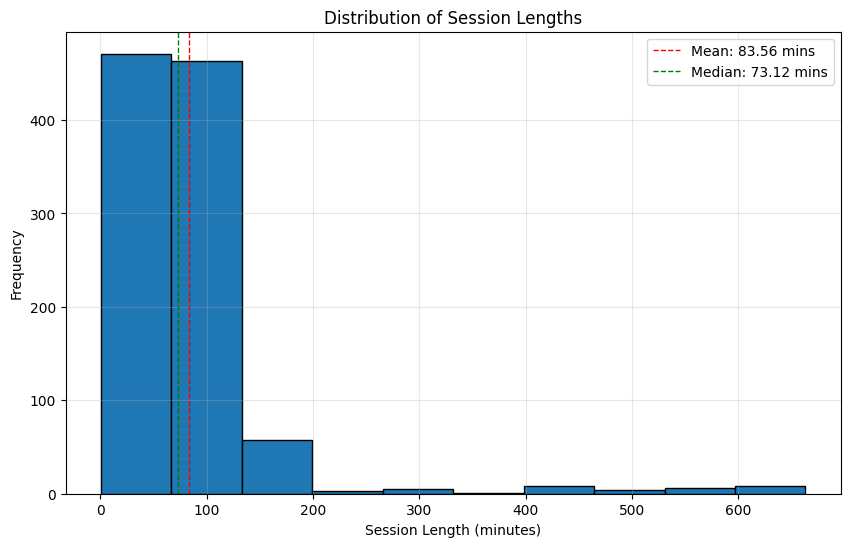

In [124]:
# Create histogram with 10 bins
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(session_lengths, bins=10, edgecolor='black')
plt.title('Distribution of Session Lengths')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add mean and median lines
plt.axvline(session_lengths.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {session_lengths.mean():.2f} mins')
plt.axvline(session_lengths.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {session_lengths.median():.2f} mins')
plt.legend()

# Show some basic statistics
print("Session Length Statistics (in minutes):")
print(session_lengths.describe())

Session Length Statistics (in hours):
count    1026.000000
mean        1.392659
std         1.423333
min         0.007778
25%         0.604583
50%         1.218611
75%         1.787014
max        11.051389
dtype: float64


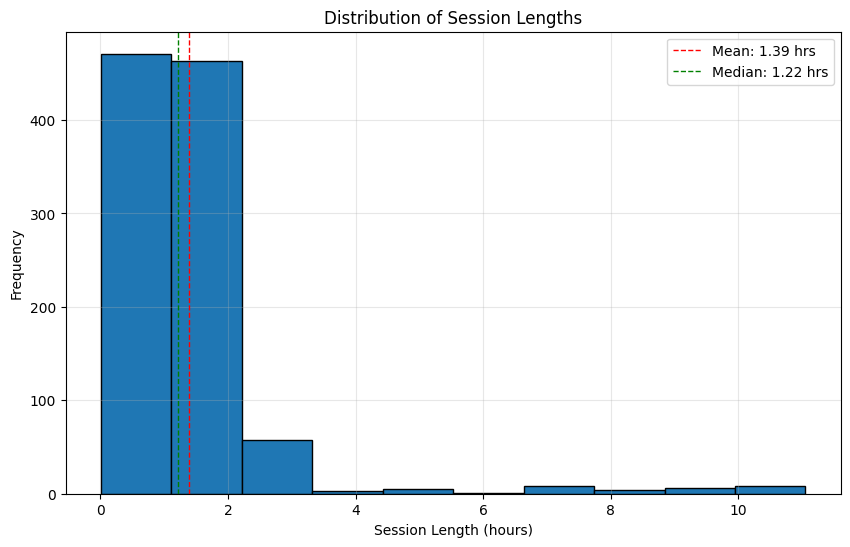

In [125]:
session_len_hr = (events_dedup.groupby('session_id')['datetime']
                  .agg(['min', 'max'])
                  .apply(lambda x: (x['max'] - x['min']).total_seconds() / 3600, axis=1))
session_len_hr

# Create histogram with 10 bins
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(session_len_hr, bins=10, edgecolor='black')
plt.title('Distribution of Session Lengths')
plt.xlabel('Session Length (hours)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add mean and median lines
plt.axvline(session_len_hr.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {session_len_hr.mean():.2f} hrs')
plt.axvline(session_len_hr.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {session_len_hr.median():.2f} hrs')
plt.legend()

# Show some basic statistics
print("Session Length Statistics (in hours):")
print(session_len_hr.describe())

### Calculating the category with highest bounce rates

In [122]:
# Adding bounce flag column
events_dedup['bounce_flag'] = (events_dedup.groupby('session_id')['datetime']
                        .transform('max') == events_dedup['datetime']).astype(int)
events_dedup.head()

,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter,bounce_flag
0,0,34,1607590072,2020-12-10 08:47:52,NaN,False,0-0,0,0
1,0,26,1607590260,2020-12-10 08:51:00,0.052222,False,0-0,0,0
2,0,187,1607590503,2020-12-10 08:55:03,0.067500,False,0-0,0,0
3,0,86,1607591006,2020-12-10 09:03:26,0.139722,False,0-0,0,0
4,0,111,1607591526,2020-12-10 09:12:06,0.144444,False,0-0,0,0


In [127]:
bounce_items = events_dedup.loc[(events_dedup["bounce_flag"] == 1),'item_id'].value_counts().reset_index(name="N_bounces")
bounce_cate = bounce_items.merge(items, on="item_id").groupby('category')['N_bounces'].sum().reset_index(name="Total_N_bounces")
bounce_cate.sort_values("Total_N_bounces", ascending=False)

,category,Total_N_bounces
2,flirt,355
0,dance,353
1,dj,318


### Country with highest average visit count per user
assumption: a visit is considered as one session
so calculating users, N_visits   -->  joining with users table   -->  then group by country and calculate average mean of N_visits

In [128]:
events_dedup.head()

,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter,bounce_flag
0,0,34,1607590072,2020-12-10 08:47:52,NaN,False,0-0,0,0
1,0,26,1607590260,2020-12-10 08:51:00,0.052222,False,0-0,0,0
2,0,187,1607590503,2020-12-10 08:55:03,0.067500,False,0-0,0,0
3,0,86,1607591006,2020-12-10 09:03:26,0.139722,False,0-0,0,0
4,0,111,1607591526,2020-12-10 09:12:06,0.144444,False,0-0,0,0


In [129]:
user_visits = events_dedup.groupby('user_id')['session_counter'].max().reset_index(name="n_visits")
avg_visit_by_country = user_visits.merge(users, on="user_id").groupby("country")['n_visits'].mean().reset_index(name = 'avg_n_visits')
avg_visit_by_country.sort_values("avg_n_visits", ascending=False)

,country,avg_n_visits
5,Japan,1.883721
4,Italy,1.822581
2,Germany,1.802817
1,France,1.578947
6,USA,1.508475
0,Belgium,1.489796
3,India,1.481481


### Performer with most number of visits by each category

In [109]:
events_dedup.head()

,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter,bounce_flag
0,0,34,1607590072,2020-12-10 08:47:52,NaN,False,0-0,0,0
1,0,26,1607590260,2020-12-10 08:51:00,0.052222,False,0-0,0,0
2,0,187,1607590503,2020-12-10 08:55:03,0.067500,False,0-0,0,0
3,0,86,1607591006,2020-12-10 09:03:26,0.139722,False,0-0,0,0
4,0,111,1607591526,2020-12-10 09:12:06,0.144444,False,0-0,0,0


In [131]:
top_performers = events_dedup.merge(items, on="item_id").groupby(['category','item_id'])['item_id'].count().reset_index(name="N_visits")
top_performers.sort_values('N_visits', ascending=False).groupby('category').head(1)


,category,item_id,N_visits
45,dance,131,173
76,dj,7,173
185,flirt,155,170


### Co-occcurence recommendation model
steps:
1. create a session-item matrix
2. calculate the co-occurence matrix
3. normalize the co-occurence matrix
4. calculate the similarity matrix
5. generate recommendations


In [132]:
import pandas as pd
from itertools import combinations
from collections import defaultdict
import numpy as np

In [133]:
events_dedup.head()


,user_id,item_id,timestamp,datetime,hours_since_last,new_session,session_id,session_counter,bounce_flag
0,0,34,1607590072,2020-12-10 08:47:52,NaN,False,0-0,0,0
1,0,26,1607590260,2020-12-10 08:51:00,0.052222,False,0-0,0,0
2,0,187,1607590503,2020-12-10 08:55:03,0.067500,False,0-0,0,0
3,0,86,1607591006,2020-12-10 09:03:26,0.139722,False,0-0,0,0
4,0,111,1607591526,2020-12-10 09:12:06,0.144444,False,0-0,0,0


In [136]:
events_dedup.session_id.unique()

array(['0-0', '0-1', '0-2', ..., '499-0', '499-1', '499-2'], dtype=object)

In [137]:
sessions_df = events_dedup.groupby('session_id')['item_id'].apply(list)
sessions_df

session_id
0-0      [34, 26, 187, 86, 111, 141, 102, 89, 3, 151, 2...
0-1                                         [123, 156, 97]
0-2                       [132, 119, 47, 114, 92, 141, 33]
1-0      [187, 46, 25, 125, 13, 23, 164, 50, 160, 4, 63...
100-1    [119, 121, 101, 170, 191, 26, 148, 131, 187, 1...
                               ...                        
99-0     [123, 99, 164, 3, 26, 145, 19, 155, 15, 27, 55...
99-1     [155, 187, 194, 128, 199, 70, 83, 101, 79, 96, 7]
99-2            [187, 182, 29, 181, 152, 12, 161, 47, 157]
99-3     [104, 163, 20, 173, 101, 46, 1, 125, 31, 93, 2...
99-4     [98, 47, 120, 128, 136, 25, 84, 191, 65, 129, ...
Name: item_id, Length: 1026, dtype: object

In [148]:
for items in sessions_df:
    print(list(combinations(set(items),2)))


[(3, 138), (3, 141), (3, 14), (3, 143), (3, 151), (3, 26), (3, 29), (3, 34), (3, 38), (3, 176), (3, 51), (3, 187), (3, 86), (3, 89), (3, 94), (3, 100), (3, 102), (3, 105), (3, 109), (3, 111), (3, 120), (3, 123), (138, 141), (138, 14), (138, 143), (138, 151), (138, 26), (138, 29), (138, 34), (138, 38), (138, 176), (138, 51), (138, 187), (138, 86), (138, 89), (138, 94), (138, 100), (138, 102), (138, 105), (138, 109), (138, 111), (138, 120), (138, 123), (141, 14), (141, 143), (141, 151), (141, 26), (141, 29), (141, 34), (141, 38), (141, 176), (141, 51), (141, 187), (141, 86), (141, 89), (141, 94), (141, 100), (141, 102), (141, 105), (141, 109), (141, 111), (141, 120), (141, 123), (14, 143), (14, 151), (14, 26), (14, 29), (14, 34), (14, 38), (14, 176), (14, 51), (14, 187), (14, 86), (14, 89), (14, 94), (14, 100), (14, 102), (14, 105), (14, 109), (14, 111), (14, 120), (14, 123), (143, 151), (143, 26), (143, 29), (143, 34), (143, 38), (143, 176), (143, 51), (143, 187), (143, 86), (143, 89), 

In [140]:
# Create co-occurrence matrix
co_occurrence = defaultdict(lambda: defaultdict(int))
for items in sessions_df:
    for item1, item2 in combinations(set(items), 2):  # Get unique pairs of items
        co_occurrence[item1][item2] += 1
        co_occurrence[item2][item1] += 1

# Convert to DataFrame for easier manipulation
co_occurrence_df = pd.DataFrame(co_occurrence).fillna(0)
co_occurrence_df

,3,138,141,14,143,151,26,29,34,38,...,24,108,22,142,18,189,107,1,43,74
138,3.0,0.0,3.0,6.0,3.0,2.0,5.0,5.0,1.0,2.0,...,2.0,2.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0
141,7.0,3.0,0.0,4.0,4.0,9.0,10.0,4.0,3.0,6.0,...,4.0,1.0,2.0,4.0,4.0,3.0,2.0,5.0,3.0,4.0
14,3.0,6.0,4.0,0.0,7.0,11.0,12.0,1.0,8.0,4.0,...,6.0,3.0,1.0,3.0,6.0,4.0,4.0,3.0,1.0,2.0
143,5.0,3.0,4.0,7.0,0.0,7.0,6.0,3.0,5.0,4.0,...,5.0,4.0,2.0,5.0,11.0,4.0,1.0,3.0,2.0,8.0
151,16.0,2.0,9.0,11.0,7.0,0.0,22.0,10.0,11.0,13.0,...,16.0,7.0,6.0,10.0,13.0,6.0,4.0,3.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2.0,3.0,6.0,2.0,4.0,6.0,3.0,5.0,1.0,2.0,...,7.0,3.0,2.0,2.0,4.0,5.0,2.0,5.0,1.0,3.0
81,1.0,6.0,4.0,4.0,0.0,8.0,5.0,5.0,2.0,4.0,...,1.0,2.0,0.0,1.0,4.0,0.0,4.0,1.0,0.0,2.0
3,0.0,3.0,7.0,3.0,5.0,16.0,9.0,7.0,10.0,8.0,...,10.0,6.0,8.0,6.0,12.0,5.0,5.0,4.0,4.0,5.0
17,0.0,2.0,3.0,2.0,6.0,5.0,3.0,6.0,1.0,5.0,...,3.0,1.0,1.0,2.0,5.0,3.0,1.0,2.0,2.0,1.0


In [141]:
# Normalize co-occurrence matrix to compute similarity scores
similarity_matrix = co_occurrence_df.copy()
for item in similarity_matrix.columns:
    norm_factor = np.sqrt(similarity_matrix[item].sum())
    similarity_matrix[item] /= norm_factor

In [3]:
similarity_matrix

NameError: name 'similarity_matrix' is not defined

In [143]:
def recommend_items(input_items, similarity_matrix, top_n=5):
    # Aggregate similarity scores for all input items
    scores = defaultdict(float)
    for item in input_items:
        if item in similarity_matrix.columns:
            similar_items = similarity_matrix[item]
            for sim_item, score in similar_items.items():
                if sim_item not in input_items:  # Exclude already consumed items
                    scores[sim_item] += score

    # Sort by aggregated scores and return top N recommendations
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return [item for item, score in sorted_scores[:top_n]]


In [144]:
# Example usage
input_items = [101, 102]  # Items consumed in the current session
recommendations = recommend_items(input_items, similarity_matrix)
print("Recommended Items:", recommendations)

Recommended Items: [131, 155, 151, 123, 148]


In [145]:
input_items = [1,4,3,2,6,88,72]
recommendations = recommend_items(input_items, similarity_matrix)
print("Recommended Items:", recommendations)

Recommended Items: [7, 46, 99, 148, 131]


In [153]:
# Extract similarity scores for input items
input_scores = similarity_matrix[input_items]

# Aggregate scores across all input items
aggregated_scores = input_scores.sum(axis=1)

# Sort by aggregated scores in descending order
sorted_scores = aggregated_scores.sort_values(ascending=False)

# Print the sorted scores
print("Similarity Scores for Input Items:")
print(sorted_scores)

Similarity Scores for Input Items:
7      2.586710
46     2.499189
99     2.413562
148    2.351337
131    2.331758
         ...   
195    0.369591
23     0.322604
107    0.322541
27     0.313016
1      0.310837
Length: 200, dtype: float64


In [154]:
list(similarity_matrix[1].items())[0]

(138, 0.03883678186903087)

In [152]:
# Convert items() to a list of tuples and get the first one
item, score = list(similarity_matrix[1].items())[0]
print(f"First item: {item}, score: {score}")

First item: 138, score: 0.03883678186903087


#### corrected version

In [155]:
def recommend_items(input_items, similarity_matrix, top_n=5):
    # Initialize scores dictionary
    scores = defaultdict(float)
    
    # For each candidate item (all items in the similarity matrix)
    for candidate_item in similarity_matrix.columns:
        if candidate_item not in input_items:  # Exclude input items
            # Calculate the total co-occurrence score with all input items
            total_score = 0
            for input_item in input_items:
                if input_item in similarity_matrix.columns:
                    # Add the similarity score between input_item and candidate_item
                    total_score += similarity_matrix.loc[candidate_item, input_item]
            
            # Store the total score for this candidate item
            scores[candidate_item] = total_score
    
    # Sort by aggregated scores and return top N recommendations
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return [item for item, score in sorted_scores[:top_n]]

In [156]:
# Example usage
input_items = [101, 102]  # Items consumed in the current session
recommendations = recommend_items(input_items, similarity_matrix)
print("Recommended Items:", recommendations)

Recommended Items: [131, 155, 151, 123, 148]


In [157]:
input_items = [1,4,3,2,6,88,72]
recommendations = recommend_items(input_items, similarity_matrix)
print("Recommended Items:", recommendations)

Recommended Items: [7, 46, 99, 148, 131]


### Weighted recommendations:

In [161]:
items_df = pd.read_csv('datasets/items.csv')
items_df.head()

,item_id,category,hair,eyes
0,0,flirt,red,blue
1,1,dance,brown,blue
2,2,dj,red,brown
3,3,flirt,blonde,brown
4,4,dj,red,brown


In [162]:
# Step 1: Calculate N_visits per item (if not already available)
item_visits = events_dedup['item_id'].value_counts().reset_index(name='N_visits')
# item_visits.columns = ['item_id', 'N_visits']

# Step 2: Merge with items dataset to get category and N_visits
items_with_weights = items_df.merge(item_visits, on='item_id', how='left')

# Step 3: Create weight mapping (example using N_visits)
# Normalize N_visits to get weights between 0 and 1
items_with_weights['weight'] = items_with_weights['N_visits'] / items_with_weights['N_visits'].max()

# Alternatively, if using category weights:
category_weights = {'dance': 1.2, 'flirt': 1.0, 'dj': 0.8}
items_with_weights['weight'] = items_with_weights['category'].map(category_weights)

# Step 4: Create a weight dictionary for quick lookup
weight_dict = dict(zip(items_with_weights['item_id'], items_with_weights['weight']))

# Step 5: Modify co-occurrence matrix creation to include weights
co_occurrence_weighted = defaultdict(lambda: defaultdict(float))  # Use float for weighted counts

for items_in_session in sessions_df:
    unique_items = set(items_in_session)
    for item1, item2 in combinations(unique_items, 2):
        # Get weights for both items
        weight1 = weight_dict.get(item1, 1.0)  # Default to 1.0 if weight not found
        weight2 = weight_dict.get(item2, 1.0)
        
        # Calculate weighted co-occurrence
        weighted_count = (weight1 + weight2) / 2  # Average of both weights
        
        # Update co-occurrence matrix
        co_occurrence_weighted[item1][item2] += weighted_count
        co_occurrence_weighted[item2][item1] += weighted_count

# Convert to DataFrame
co_occurrence_weighted_df = pd.DataFrame(co_occurrence_weighted).fillna(0)

In [163]:
# Normalize co-occurrence matrix to compute similarity scores
w_similarity_matrix = co_occurrence_weighted_df.copy()
for item in w_similarity_matrix.columns:
    norm_factor = np.sqrt(w_similarity_matrix[item].sum())
    w_similarity_matrix[item] /= norm_factor

In [164]:
# Example usage
input_items = [101, 102]  # Items consumed in the current session
recommendations = recommend_items(input_items, w_similarity_matrix)
print("Recommended Items:", recommendations)

Recommended Items: [131, 155, 151, 148, 123]


In [165]:
input_items = [1,4,3,2,6,88,72]
recommendations = recommend_items(input_items, w_similarity_matrix)
print("Recommended Items:", recommendations)

Recommended Items: [148, 131, 136, 7, 187]


In [168]:
# Find the details of the input items
input_items_details = items_with_weights[items_with_weights['item_id'].isin(input_items)]
input_items_details

,item_id,category,hair,eyes,N_visits,weight
1,1,dance,brown,blue,40,1.2
2,2,dj,red,brown,52,0.8
3,3,flirt,blonde,brown,95,1.0
4,4,dj,red,brown,79,0.8
6,6,dj,brown,blue,35,0.8
72,72,dj,brown,blue,62,0.8
88,88,flirt,red,green,45,1.0


In [171]:
items_with_weights[items_with_weights['item_id'].isin([7, 46, 99, 148, 131])]

,item_id,category,hair,eyes,N_visits,weight
7,7,dj,blonde,green,173,0.8
46,46,dj,blonde,blue,153,0.8
99,99,dj,blonde,blue,152,0.8
131,131,dance,red,green,173,1.2
148,148,dance,brown,green,163,1.2


In [169]:
items_with_weights[items_with_weights['item_id'].isin([148, 131, 136, 7, 187])]

,item_id,category,hair,eyes,N_visits,weight
7,7,dj,blonde,green,173,0.8
131,131,dance,red,green,173,1.2
136,136,dance,red,blue,140,1.2
148,148,dance,brown,green,163,1.2
187,187,dance,red,blue,131,1.2


## Using Apriori Algorithm

In [ ]:
from itertools import combinations
from collections import defaultdict

In [2]:
sessions_df

NameError: name 'sessions_df' is not defined

In [ ]:


# Sample session data
sessions = [
    [101, 102, 201],
    [102, 202],
    [101, 203],
    [101, 102],
    [102, 201]
]

# Step 1: Generate all possible itemsets and count their occurrences
min_support = 2
itemset_counts = defaultdict(int)

for session in sessions:
    for size in range(1, len(session) + 1): # Generate all subsets of items
        for itemset in combinations(session, size):
            itemset_counts[itemset] += 1

# Filter itemsets by minimum support
frequent_itemsets = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support}

# Step 2: Generate association rules
rules = []
for itemset, count in frequent_itemsets.items():
    if len(itemset) > 1:
        for i in range(1, len(itemset)):
            for antecedent in combinations(itemset, i):
                consequent = tuple(sorted(set(itemset) - set(antecedent)))
                antecedent_count = itemset_counts[antecedent]
                confidence = count / antecedent_count
                rules.append((antecedent, consequent, confidence))

# Step 3: Recommend items based on input
def recommend_apriori(input_items, rules, top_n=5):
    recommendations = defaultdict(float)
    for antecedent, consequent, confidence in rules:
        if set(antecedent).issubset(set(input_items)):
            recommendations[consequent] += confidence
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return [item for item, score in sorted_recommendations[:top_n]]

# Example usage
input_items = [101, 102]
recommendations = recommend_apriori(input_items, rules)
print("Recommended Items:", recommendations)
